<img src='__code/__all/notebook_rules.png' width="50%"/>

In [1]:
import warnings
warnings.filterwarnings('ignore')

from __code.step1_prepare_timepix_images import Step1PrepareTimePixImages

from __code import system

system.System.select_working_dir(instrument='VENUS', instrument_to_exclude=["CG1D", "SNAP"], ipts="IPTS-35207")
from __code.__all import custom_style
custom_style.style()

Step1PrepareTimePixImages.legend()

** Using Debugging Mode! **


# <font color='red'>Select detector type</font>

In [2]:
o_white_beam = Step1PrepareTimePixImages(system=system)

logging file: /SNS/VENUS/shared/log/j35_step1_prepare_timepix_images.log


Dropdown(index=1, layout=Layout(width='400px'), options=('tpx1 - old naming convention (until July 2025)', 'tp…

# <font color='red'>Input sample folder</font>

This folder will contain all folders (each folder is one projection)

<font color='blue'><b>Instructions</b>: select folder containing projections</font>

In [3]:
o_white_beam.select_top_sample_folder()

# <font color='red'>Input Open Beam (OB) folder(s)</font>

Select the folders to use as OB

<font color='blue'><b>Instructions</b>: select individual folders</font>

In [4]:
o_white_beam.select_top_ob_folder()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Input infos</font><font color='purple' size='3'> - OPTIONAL</font>

In [5]:
o_white_beam.infos()

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color=red>Pre-processing the data</font>

This step will filter the data using the following criteria

* all the runs that do not have any tif images in it will be **rejected**
* the proton charge of each run will be retrieved and display in a recap graph. It will be up to the users to **select the proton charge** to use as well as the **acceptance criteria**. This is because the proton charge of each run is always slightly different, this criteria define the range for which 2 runs are considered being acquired with the same proton charge.

<img src="__code/__all/TutorialProtonChargeSelection.gif" width=400, height=400/>

<font color='blue'><b>Instructions</b>

 - Use the sliders to define the **sample proton charge** and **OB proton charge** to use
 - Use the second slider to define the size of the **acceptance criteria range**

<font size=1 color='red'><u>Developer Notes</u>: data are stored in <i>list_of_runs = {DataType.sample: {'Run_1234':
 {Run.full_path: "", Run.proton_charge: "", Run.use_it: "", Run.angle: ""}, ...}</i></font>

In [ ]:
%matplotlib ipympl
o_white_beam.preload_and_check_data()

interactive(children=(FloatSlider(value=2.49997984379, description='sample pc', max=3.50012176726, min=1.49997…

This will recap the list of runs that will be used for SAMPLE and OB. 

<font color='blue'><b>Instructions</b>: Because some runs look like they are ok but still need to be rejected, **Feel free to manually select any run you want to exclude !**</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will set the <i>Run.use_it</i> parametere of the <i>list_of_runs</i> dictionary. 

In [7]:
o_white_beam.recap_data()

Button(description='Clear All', style=ButtonStyle())

RadioButtons(options=('Keep only one', 'Combine (average)'), value='Keep only one')

# <font color=red>Select range of TOF you want to integrate</font>

In [8]:
o_white_beam.how_to_integrate()

HTML(value='<hr>')

interactive(children=(IntRangeSlider(value=(0, 1482), continuous_update=False, description='File index Range:'…

# <font color=red>Load, combine duplicates (if requested) and integrate in TOF</font>

This step will:
 - load the data to keep
 - combine the duplicated angles (if requested)
 - integrate over the range of TOF selected
 - sort the runs by increasing angle value.

<font size=1 color=red><u>Developer Notes</u>: change the value of <i>Run.use_it</i> for runs rejected and combine runs data in <i>master_3d_data_array = {DataType.sample: [runs, y, x], ...}</font>

In [9]:
o_white_beam.load_images()

100%|██████████| 3/3 [00:03<00:00,  1.11s/it]


<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

Select the mode you want to use:
 - all images <b>(this may take a long time to process !)</b>
 - visual verification of raw and ob

In [10]:
o_white_beam.how_to_visualize()


ToggleButtons(index=2, options=('All images', '1 image at a time', 'Statistics', 'Integrated intensity vs imag…

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', layout=Layout(width='80…

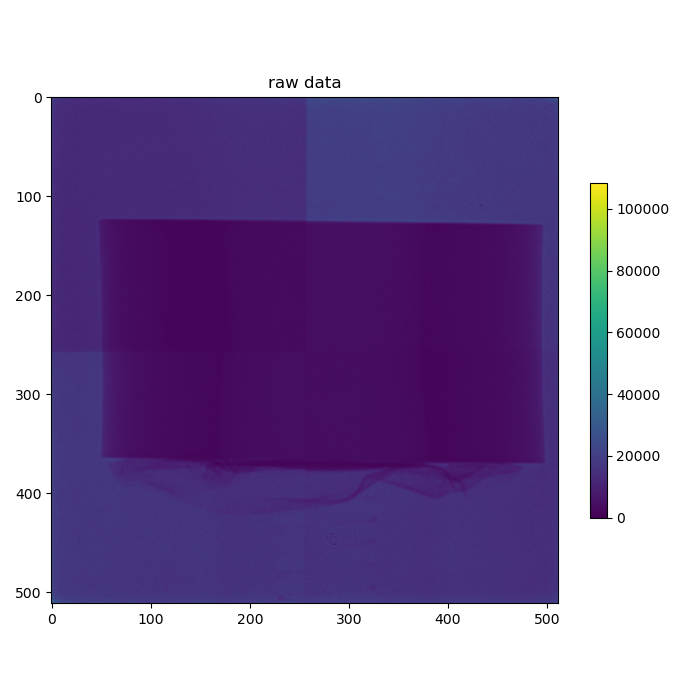

In [12]:
o_white_beam.visualize_raw_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Crop the raw data</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the dictionary <i>master_3d_data_array</i>

In [ ]:
o_white_beam.pre_processing_crop_settings()

execute the cropping

In [ ]:
o_white_beam.pre_processing_crop()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Remove outliers</font><font color='purple' size='3'> - OPTIONAL</font>

Three algorithms are provided:

* using `in-house` method with histogram (remove dead pixels and abnormal very high counts)
* using Tomopy `remove_outlier` method (remove high intensity bright spots)
* using Scipy `gamma_filter` method

<font color='blue'><b>Instructions</b>: select the algorithms you want to use.

<font size=1 color='red'><u>Developer Notes</u>: this step will update the dictionary <i>master_3d_data_array</i>

In [ ]:
o_white_beam.clean_images_settings()

The next cell will be ignored if you didn't select <b>histogram</b>. 

<font color='blue'><b>Instructions</b>: if using the <b>histogram</b> algorithm, by default, all the pixels found in the first and last bin are considered as **bad** pixels. You have the option to change those settings. </font>

In [ ]:
o_white_beam.clean_images_setup()

Launch the cleaning

In [ ]:
o_white_beam.clean_images()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

Select the mode you want to use:
 - all images <b>(this may take a long time to process !)</b>
 - visual verification of raw, ob and dc

### How do you want to visualize the cleaned data?

In [ ]:
o_white_beam.how_to_visualize_after_cleaning()

Launch the visualization

In [ ]:
o_white_beam.visualize_cleaned_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rebin pixels</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d arrays <i>master_3d_data_array</i></font>

Select how you want to combine (bin) the pixels

In [ ]:
o_white_beam.rebin_settings()

Perform the binning

In [ ]:
o_white_beam.rebin_before_normalization()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Visualize rebinned data</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.visualization_normalization_settings()

In [ ]:
o_white_beam.visualize_rebinned_data(before_normalization=True)

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Normalization</font>


<font color='blue'><b>Instructions</b>: in order to improve the normalization, you can turn ON/OFF any of the following 

- <font color=red><b>use beam fluctuation correction (ROI)</b></font>: that option will consider the fluctuation of the beam by matching for each projection the background region with the equivalent region of the OB. Make sure you select a region that does not contain any part of the sample.
- <font color=red><b>use sample ROI normalization</b></font>: select a region that does not contain any part of the sample and the program will make sure that this region after normalization is 1</font></i>

In [ ]:
o_white_beam.normalization_settings()

This next cell will allow you to select the background region within the projections images, or will just be ignored if you not chose to use it.

<font color='blue'><b>Instructions</b>: define ROI

Make sure you select a region <font color='red'> OUTSIDE</font> of your sample

<img src="__code/__all/demo_of_roi_selection.gif" width="30%" />

NB: The next cell will be ignored if you didn't select <b>Use ROI</b>

In [ ]:
o_white_beam.normalization_select_roi()

This cell will perform the normalization using any of the settings you define just above.

<font size=1 color='red'><u>Developer Notes</u>: this step will create the 3d array <i>normalized_images</i></font>

In [ ]:
o_white_beam.normalization()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Visualize normalized data</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.visualization_normalization_settings()

In [ ]:
o_white_beam.visualize_normalization()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Export the normalized data</font><font color='purple' size='3'> - OPTIONAL</font>


Select the folder where to export the normalized images


In [ ]:
o_white_beam.select_export_normalized_folder()

Run this cell to execute the export of the normalized images


In [ ]:
o_white_beam.export_normalized_images()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rebin pixels</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images</i></font>

Select how you want to combine (bin) the pixels

In [ ]:
o_white_beam.rebin_settings()

Perform the binning

In [ ]:
o_white_beam.rebin_after_normalization()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Visualize rebinned data</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.visualization_normalization_settings()

In [ ]:
o_white_beam.visualize_rebinned_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Crop the data</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images</i>

In [ ]:
o_white_beam.crop_settings()

execute the cropping

In [ ]:
o_white_beam.crop()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rotate the data</font><font color='purple' size='3'> - OPTIONAL</font>

<font color='blue'>The reconstruction algorithm will ONLY work if the rotation axis is VERTICAL</font>!

select the angle to use!

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images_log</i>

In [ ]:
o_white_beam.rotate_data_settings()

Run to perform the transformation by the angle specified

In [ ]:
o_white_beam.apply_rotation()

Vizualize the images after rotation - OPTIONAL

In [ ]:
o_white_beam.visualize_after_rotation()

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Minus log conversion</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will create the 3d array <i>normalized_images_log</i>

In [ ]:
o_white_beam.log_conversion_and_cleaning()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='3'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>


In [ ]:
o_white_beam.visualize_images_after_log()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Remove stripes</font><font color='purple' size='3'> - OPTIONAL</font>

<font color='blue'>
You have the option here to play with various strips removal algorithms (those can caused ring artifacts during the reconstruction).<br>

<u><b>INSTRUCTIONS</b></u>

<b>1.</b> Select the range of data to use to test the algorithms<br><br>
<b>2.</b> Select 1 or any number of algorithms you want to test<br>
<b>3.</b> Define the settings for each of those algorithms selected<br>
<b>4.</b> Run the algorithms on a subset of your data<br><br>
Repeat <b>2.</b> to <b>4.</b> if needed<br><br>
Once you are happy with the result<br><br>
<b>5.</b> Select when to apply the algorithms on the full data set (<b>in</b> or <b>outside notebook</b>)
<br><font size='1px'>- <b>in notebook</b> will run the correction now and may take some time
<br>- <b>outside notebook</b> will run the correction just before the CT reconstruction, in the background [Recommended for big data sets]</font>

</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will ultimately update the 3d array if in_notebook option selected <i>normalized_images_log</i>

#### 1. Select the range of data to use to test the algorithms

In [ ]:
o_white_beam.select_range_of_data_to_test_stripes_removal()

#### 2. Select the algorithms to apply

In [ ]:
o_white_beam.select_remove_strips_algorithms()

#### 3. Define the settings for each of the algorithms selected

In [ ]:
o_white_beam.define_settings()

#### 4. Run the algorithms selected and display results

In [ ]:
o_white_beam.test_algorithms_on_selected_range_of_data()

DONE with the testing ?

* If not, go back to 2.
* if you are, resume the execution of the notebook!

#### 5. Select when to perform the cleaning (if any) on the full data set

In [ ]:
o_white_beam.when_to_remove_strips()

If you selected **in notebook**, the strips will be removed now on the entire volume. **Please be patient** as it may takes a while to perform (depending on how many algorithm you selected)

In [ ]:
o_white_beam.remove_strips()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='3'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.display_removed_strips()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='orange' size='5'>Calculate and apply tilt correction</font><font color='orange' size='3'> - OPTIONAL but RECOMMENDED</font>

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>tilt</b> then apply it on the volume.
<br><br>

<font color='blue'><b>Instructions</b>: first, you need to select an vertical range contaning the sample

<font color='blue'>TIPS</font> - Make sure the sample is within the range defined

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images_log</i>

In [ ]:
o_white_beam.select_sample_roi()

Perform the calculation of the tilt and apply it

In [ ]:
o_white_beam.perform_tilt_correction()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='orange' size='5'>Calculate center of rotation</font><font color='orange' size='3'> - OPTIONAL</font>

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>center of rotation</b> 

<font size=1 color='red'><u>Developer Notes</u>: this step will use the 3d array <i>normalized_images_log</i>

In [ ]:
o_white_beam.center_of_rotation_settings()

Select the mode you want to use to calculate the **center of rotation**

* **automatic mode** will use the [algotom](https://algotom.github.io) library
* **manual mode** will let you figure out the center of rotation

<font color=red>NB</font>: if you selected **automatic mode**, first, you will need to select the 180 or 360 degrees mode to use to estimate the center of rotation.

In [ ]:
o_white_beam.run_center_of_rotation()

In [ ]:
o_white_beam.run_center_of_rotation_or_skip_it()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='3'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.display_center_of_rotation()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Test reconstruction</font><font color='purple' size='3'> - OPTIONAL</font>

<b>Select a couple of slices to use to reconstruct</b>. 

This will allow to test:
- the calculation of the center of rotation
- tilt angle value
- cleaning of the data (outlisers, stripes)
- more ...

In [ ]:
o_white_beam.select_slices_to_use_to_test_reconstruction()

Perform the reconstruction on those slices

In [ ]:
o_white_beam.run_reconstruction_of_slices_to_test()

<hr style="border-bottom: dotted 1px;" /><hr style="height: 2px" />

# <font color='red'>Select reconstruction method(s)</font>

In [ ]:
o_white_beam.select_reconstruction_method()

# <font color='red'>Set up reconstruction parameters</font>

<font color='blue'><b>Instructions</b>: 

- define the reconstruction settings (keeping the <b>default values</b> is a good choice for novice users)</font>



In [ ]:
o_white_beam.reconstruction_settings()

# <font color='red'>Create config file and export pre-processed images</font>

* <b>config file</b> will be used in the next step (step1_####.json)
* <b>log file</b> to check the full process up to here
* <b>stack of projectons ready to be reconstructed</b>

In [ ]:
o_white_beam.select_export_extra_files()

In [ ]:
o_white_beam.export_extra_files(prefix='step1')

<hr style="border-bottom: dotted 1px;" /><hr>